In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df_ng = pd.read_csv('data/NG Sensors.csv', delimiter=';')
df_pv = pd.read_csv('data/PV Sensors.csv', delimiter=';')


In [3]:
df_ng.head()

,Timestamp,br1,ec,hum,ph,tp
0,2025-01-25 11:00:00,16230.648667,0.523810,43.343354,8.310000,21.874396
1,2025-01-25 13:00:00,16144.080563,0.523810,42.778063,8.310000,22.288000
2,2025-01-25 15:00:00,16224.752042,0.523810,43.505875,8.310000,22.583271
3,2025-01-25 17:00:00,16076.304046,0.355795,43.437862,5.644528,22.446143
4,2025-01-25 19:00:00,16056.443165,0.000000,40.700000,0.000000,22.425759


In [4]:
data = pd.read_excel('data/Edited dataset Omar.xlsx')

In [5]:
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index', 'sample_id', 'Notes'], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   solar_grid                      20 non-null     object
 1   plant_length_cm                 20 non-null     object
 2   plant_width_cm                  20 non-null     object
 3   crop_yield_g                    20 non-null     object
 4   shape                           20 non-null     object
 5   root_len_cm                     20 non-null     object
 6   root_health                     20 non-null     object
 7   plant_height                    20 non-null     object
 8   chlorophyll_mgg                 20 non-null     object
 9   plant_dry_matter                20 non-null     object
 10  leaf_count                      20 non-null     object
 11  leaf_size                       20 non-null     object
 12  disease_occurrence_trend        20 non-null     obje

In [7]:
data.head()

,solar_grid,plant_length_cm,plant_width_cm,crop_yield_g,shape,root_len_cm,root_health,plant_height,chlorophyll_mgg,plant_dry_matter,leaf_count,leaf_size,disease_occurrence_trend,water_use_efficiency,energy_consumption,growth_rate,nutrient_absorption_efficiency,marketable_yield
0,S,30.4,28.4,531,R,24,GOOD,15.7,0.441,7.77,23,6.98,High,2.59,0.58,0.61,87.6,97.5
1,S,44.4,42.8,533,R,10,GOOD,16.7,0.518,9.61,25,9.56,Low,3.06,0.8,1.43,78.4,92.7
2,S,40.9,39.9,633,Ir,12,GOOD,19.1,0.42,6.59,31,8.78,Low,4.51,2.39,1.2,86.5,82.1
3,S,32.4,26.5,821,R,29,GOOD,22.9,0.396,7.83,35,5.23,Low,2.23,0.96,1.08,86.8,96.1
4,S,42.3,30,392,R,21,FAIR,28,0.462,9.5,36,5.34,High,4.15,2.4,1.36,94.5,88.9


In [8]:
data.columns

Index(['solar_grid', 'plant_length_cm', 'plant_width_cm', 'crop_yield_g',
       'shape', 'root_len_cm', 'root_health', 'plant_height',
       'chlorophyll_mgg', 'plant_dry_matter', 'leaf_count', 'leaf_size',
       'disease_occurrence_trend', 'water_use_efficiency',
       'energy_consumption', 'growth_rate', 'nutrient_absorption_efficiency',
       'marketable_yield'],
      dtype='object')

In [9]:
numeric_cols = ['plant_length_cm', 'plant_width_cm', 'crop_yield_g',
                'root_len_cm', 'plant_height', 'chlorophyll_mgg', 
                'plant_dry_matter', 'leaf_count', 'leaf_size',
                'water_use_efficiency','energy_consumption', 'growth_rate', 
                'nutrient_absorption_efficiency',]
target = ['marketable_yield']

category_cols = ['solar_grid', 'shape', 'root_health', 'disease_occurrence_trend']

In [10]:
data[numeric_cols+target] = data[numeric_cols+target].apply(pd.to_numeric, downcast='float')

In [ ]:
data['solar_grid_edit'] = data['solar_grid']=='S'  # True(1) if S for solar grid, False(0) if not

In [ ]:
data['shape_edit'] = data['shape']=='R'  # True(1) if regular shape, False(0) if not

In [13]:
data['root_health_edit'] = data['root_health'].replace({'GOOD': 2, 'FAIR': 1, 'POOR': 0})
data['disease_occurrence_trend_edit'] = data['disease_occurrence_trend'].replace({'Low': 2, 'Moderate': 1, 'High': 0})


C:\Users\tania\AppData\Local\Temp\ipykernel_9772\1031597948.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['root_health_edit'] = data['root_health'].replace({'GOOD': 2, 'FAIR': 1, 'POOR': 0})
C:\Users\tania\AppData\Local\Temp\ipykernel_9772\1031597948.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['disease_occurrence_trend_edit'] = data['disease_occurrence_trend'].replace({'Low': 2, 'Moderate': 1, 'High': 0})


In [14]:
data_new = data.drop(columns=category_cols)

In [19]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   plant_length_cm                 20 non-null     float32
 1   plant_width_cm                  20 non-null     float32
 2   crop_yield_g                    20 non-null     float32
 3   root_len_cm                     20 non-null     float32
 4   plant_height                    20 non-null     float32
 5   chlorophyll_mgg                 20 non-null     float32
 6   plant_dry_matter                20 non-null     float32
 7   leaf_count                      20 non-null     float32
 8   leaf_size                       20 non-null     float32
 9   water_use_efficiency            20 non-null     float32
 10  energy_consumption              20 non-null     float32
 11  growth_rate                     20 non-null     float32
 12  nutrient_absorption_efficiency  20 non

EDA

In [16]:
data_new[numeric_cols+target].corr()

,plant_length_cm,plant_width_cm,crop_yield_g,root_len_cm,plant_height,chlorophyll_mgg,plant_dry_matter,leaf_count,leaf_size,water_use_efficiency,energy_consumption,growth_rate,nutrient_absorption_efficiency,marketable_yield
plant_length_cm,1.000000,0.420589,-0.086638,-0.112763,-0.098899,-0.147462,0.325906,0.343907,-0.262712,0.061262,0.352371,0.208341,0.394791,-0.037556
plant_width_cm,0.420589,1.000000,0.025075,-0.431720,-0.354731,0.074106,0.184149,0.059891,0.177420,0.166392,0.372095,0.280208,0.139361,-0.204639
crop_yield_g,-0.086638,0.025075,1.000000,-0.152310,0.353439,0.191450,-0.349113,0.148089,0.391431,-0.246799,0.023295,-0.208328,-0.040168,-0.287550
root_len_cm,-0.112763,-0.431720,-0.152310,1.000000,0.111669,-0.373041,0.119159,0.220006,-0.305807,-0.148744,-0.150861,-0.230493,0.239595,0.257194
plant_height,-0.098899,-0.354731,0.353439,0.111669,1.000000,0.258296,-0.237031,0.011635,-0.127202,-0.007399,0.229341,0.061500,-0.402643,-0.454776
chlorophyll_mgg,-0.147462,0.074106,0.191450,-0.373041,0.258296,1.000000,-0.030536,-0.134237,0.299744,0.134311,0.162679,0.030243,-0.496226,0.123734
plant_dry_matter,0.325906,0.184149,-0.349113,0.119159,-0.237031,-0.030536,1.000000,0.299497,-0.054313,-0.099448,-0.243978,0.088651,0.437396,0.441402
leaf_count,0.343907,0.059891,0.148089,0.220006,0.011635,-0.134237,0.299497,1.000000,-0.000580,0.119279,0.383578,0.009524,0.253523,0.364367
leaf_size,-0.262712,0.177420,0.391431,-0.305807,-0.127202,0.299744,-0.054313,-0.000580,1.000000,0.067444,-0.116818,-0.245215,-0.144357,0.044983
water_use_efficiency,0.061262,0.166392,-0.246799,-0.148744,-0.007399,0.134311,-0.099448,0.119279,0.067444,1.000000,0.455751,0.125264,-0.039484,-0.228224


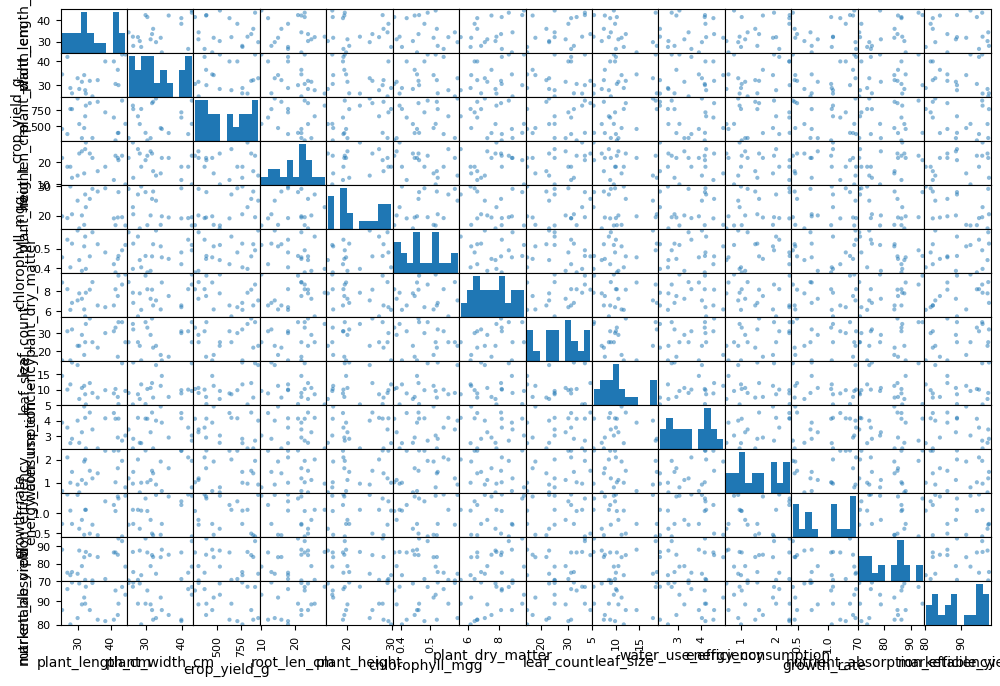

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_new[numeric_cols+target], figsize=(12, 8))
plt.show()

In [18]:
data_new[numeric_cols+target].describe()

,plant_length_cm,plant_width_cm,crop_yield_g,root_len_cm,plant_height,chlorophyll_mgg,plant_dry_matter,leaf_count,leaf_size,water_use_efficiency,energy_consumption,growth_rate,nutrient_absorption_efficiency,marketable_yield
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,34.634998,33.225002,598.099976,19.750000,22.455000,0.478850,7.583500,26.950001,10.672998,3.501500,1.471000,0.965000,81.430000,89.524994
std,6.063547,5.649209,221.460434,5.159304,4.857710,0.064831,1.161525,7.221860,3.980520,0.822482,0.599455,0.371108,7.440365,6.144906
min,25.200001,25.299999,273.000000,10.000000,15.700000,0.378000,5.520000,15.000000,5.230000,2.230000,0.580000,0.420000,70.500000,80.099998
25%,30.275000,28.699999,391.250000,15.750000,19.175001,0.435750,6.590000,22.750000,8.285000,2.820000,0.990000,0.685000,74.750002,83.775000
50%,33.000000,31.949999,583.000000,21.500000,20.300000,0.471000,7.640000,27.000000,9.910000,3.510000,1.440000,1.055000,83.850002,88.900002
75%,41.025002,37.275002,781.250000,23.250000,27.400001,0.522750,8.292500,32.250000,11.787500,4.155000,1.965000,1.307500,86.575001,95.324999
max,44.400002,42.799999,933.000000,29.000000,29.900000,0.592000,9.610000,38.000000,18.730000,4.930000,2.400000,1.460000,94.500000,97.900002


Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data_new.drop(target, axis=1)
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# df_scaled = pd.concat([X_scaled_df, data_new[target]], axis=1)

In [23]:
X_scaled_df.head()

,plant_length_cm,plant_width_cm,crop_yield_g,root_len_cm,plant_height,chlorophyll_mgg,plant_dry_matter,leaf_count,leaf_size,water_use_efficiency,energy_consumption,growth_rate,nutrient_absorption_efficiency,solar_grid_edit,shape_edit,root_health_edit,disease_occurrence_trend_edit
0,-0.716580,-0.876290,-0.310860,0.845154,-1.426698,-0.598991,0.164736,-0.561159,-0.951870,-1.137021,-1.524963,-0.981446,0.850803,1.0,0.733799,0.392232,-1.376494
1,1.652280,1.738959,-0.301594,-1.938883,-1.215491,0.619564,1.790013,-0.277028,-0.286875,-0.550735,-1.148429,1.285556,-0.417817,1.0,0.733799,0.392232,0.917663
2,1.060065,1.212277,0.161684,-1.541164,-0.708597,-0.931324,-0.877561,0.575366,-0.487921,1.258021,1.572886,0.649690,0.699120,1.0,-1.362770,0.392232,0.917663
3,-0.378171,-1.221358,1.032648,1.839453,0.093987,-1.311133,0.217734,1.143629,-1.402932,-1.586091,-0.874586,0.317933,0.740489,1.0,0.733799,0.392232,0.917663
4,1.296951,-0.585707,-0.954817,0.248575,1.171138,-0.266658,1.692850,1.285694,-1.374580,0.808950,1.590001,1.092031,1.802268,1.0,0.733799,-1.568929,-1.376494


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, data_new[target], test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


1.0

In [27]:
y_pred = reg.predict(X_test)
root_mean_squared_error(y_test, y_pred)

28.3669111404972

In [28]:
y_test.describe()

,marketable_yield
count,4.000000
mean,90.149994
std,6.755491
min,81.500000
25%,87.050001
50%,90.799999
75%,93.899998
max,97.500000


Dimensionality reduction - PCA

In [29]:
from sklearn.decomposition import PCA
import numpy as np

def apply_pca(X_scaled, y, n_components=7):

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Get explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Create DataFrame with transformed features
    pca_df = pd.DataFrame(
        X_pca, 
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # Add target back to DataFrame
    pca_df['target'] = y.values
    
    # Print variance explained
    print("\nExplained variance ratio by component:")
    for i, var in enumerate(explained_variance):
        print(f"PC{i+1}: {var:.3f}")
    
    print("\nCumulative explained variance ratio:")
    for i, var in enumerate(cumulative_variance):
        print(f"First {i+1} components: {var:.3f}")
        
    return pca_df, pca, scaler

In [31]:
pca_df, pca, scaler = apply_pca(X_scaled=X_scaled, y = data_new[target], n_components=7)


Explained variance ratio by component:
PC1: 0.174
PC2: 0.144
PC3: 0.136
PC4: 0.124
PC5: 0.090
PC6: 0.080
PC7: 0.061

Cumulative explained variance ratio:
First 1 components: 0.174
First 2 components: 0.318
First 3 components: 0.453
First 4 components: 0.577
First 5 components: 0.667
First 6 components: 0.747
First 7 components: 0.808


In [32]:
X = pca_df.drop('target', axis=1)
y = pca_df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Modelling on post-PCA dataset

In [33]:
reg_PCA = LinearRegression().fit(X_train, y_train)
reg_PCA.score(X_train, y_train)

0.2380403380498437

In [35]:
y_pred = reg_PCA.predict(X_test)
root_mean_squared_error(y_test, y_pred)

3.8081599141602016